In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/breast%20cancer.csv",index_col=0)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.isnull().sum()# no null value

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [4]:
df=df.drop(['Unnamed: 32'],axis=1) # delete nonrequired data

In [5]:
df.nunique()

diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: int64

In [6]:
for i in df:
     print(df[i].value_counts()) # no unrelevant data

diagnosis
B    357
M    212
Name: count, dtype: int64
radius_mean
12.34    4
11.71    3
12.46    3
13.05    3
10.26    3
        ..
12.23    1
14.45    1
19.18    1
18.08    1
7.76     1
Name: count, Length: 456, dtype: int64
texture_mean
20.52    3
16.85    3
16.84    3
19.83    3
14.93    3
        ..
18.58    1
15.11    1
22.41    1
14.92    1
24.54    1
Name: count, Length: 479, dtype: int64
perimeter_mean
82.61     3
87.76     3
134.70    3
93.97     2
82.69     2
         ..
127.50    1
90.63     1
82.53     1
100.40    1
47.92     1
Name: count, Length: 522, dtype: int64
area_mean
512.2     3
1075.0    2
582.7     2
399.8     2
641.2     2
         ..
507.4     1
609.9     1
463.7     1
428.9     1
181.0     1
Name: count, Length: 539, dtype: int64
smoothness_mean
0.10070    5
0.11500    4
0.10540    4
0.10750    4
0.10630    3
          ..
0.08876    1
0.09965    1
0.13230    1
0.08968    1
0.05263    1
Name: count, Length: 474, dtype: int64
compactness_mean
0.11470    3
0.1206

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
df['diagnosis']=df['diagnosis'].replace({'M':1,'B':0})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                 

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(569, 31)

In [12]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


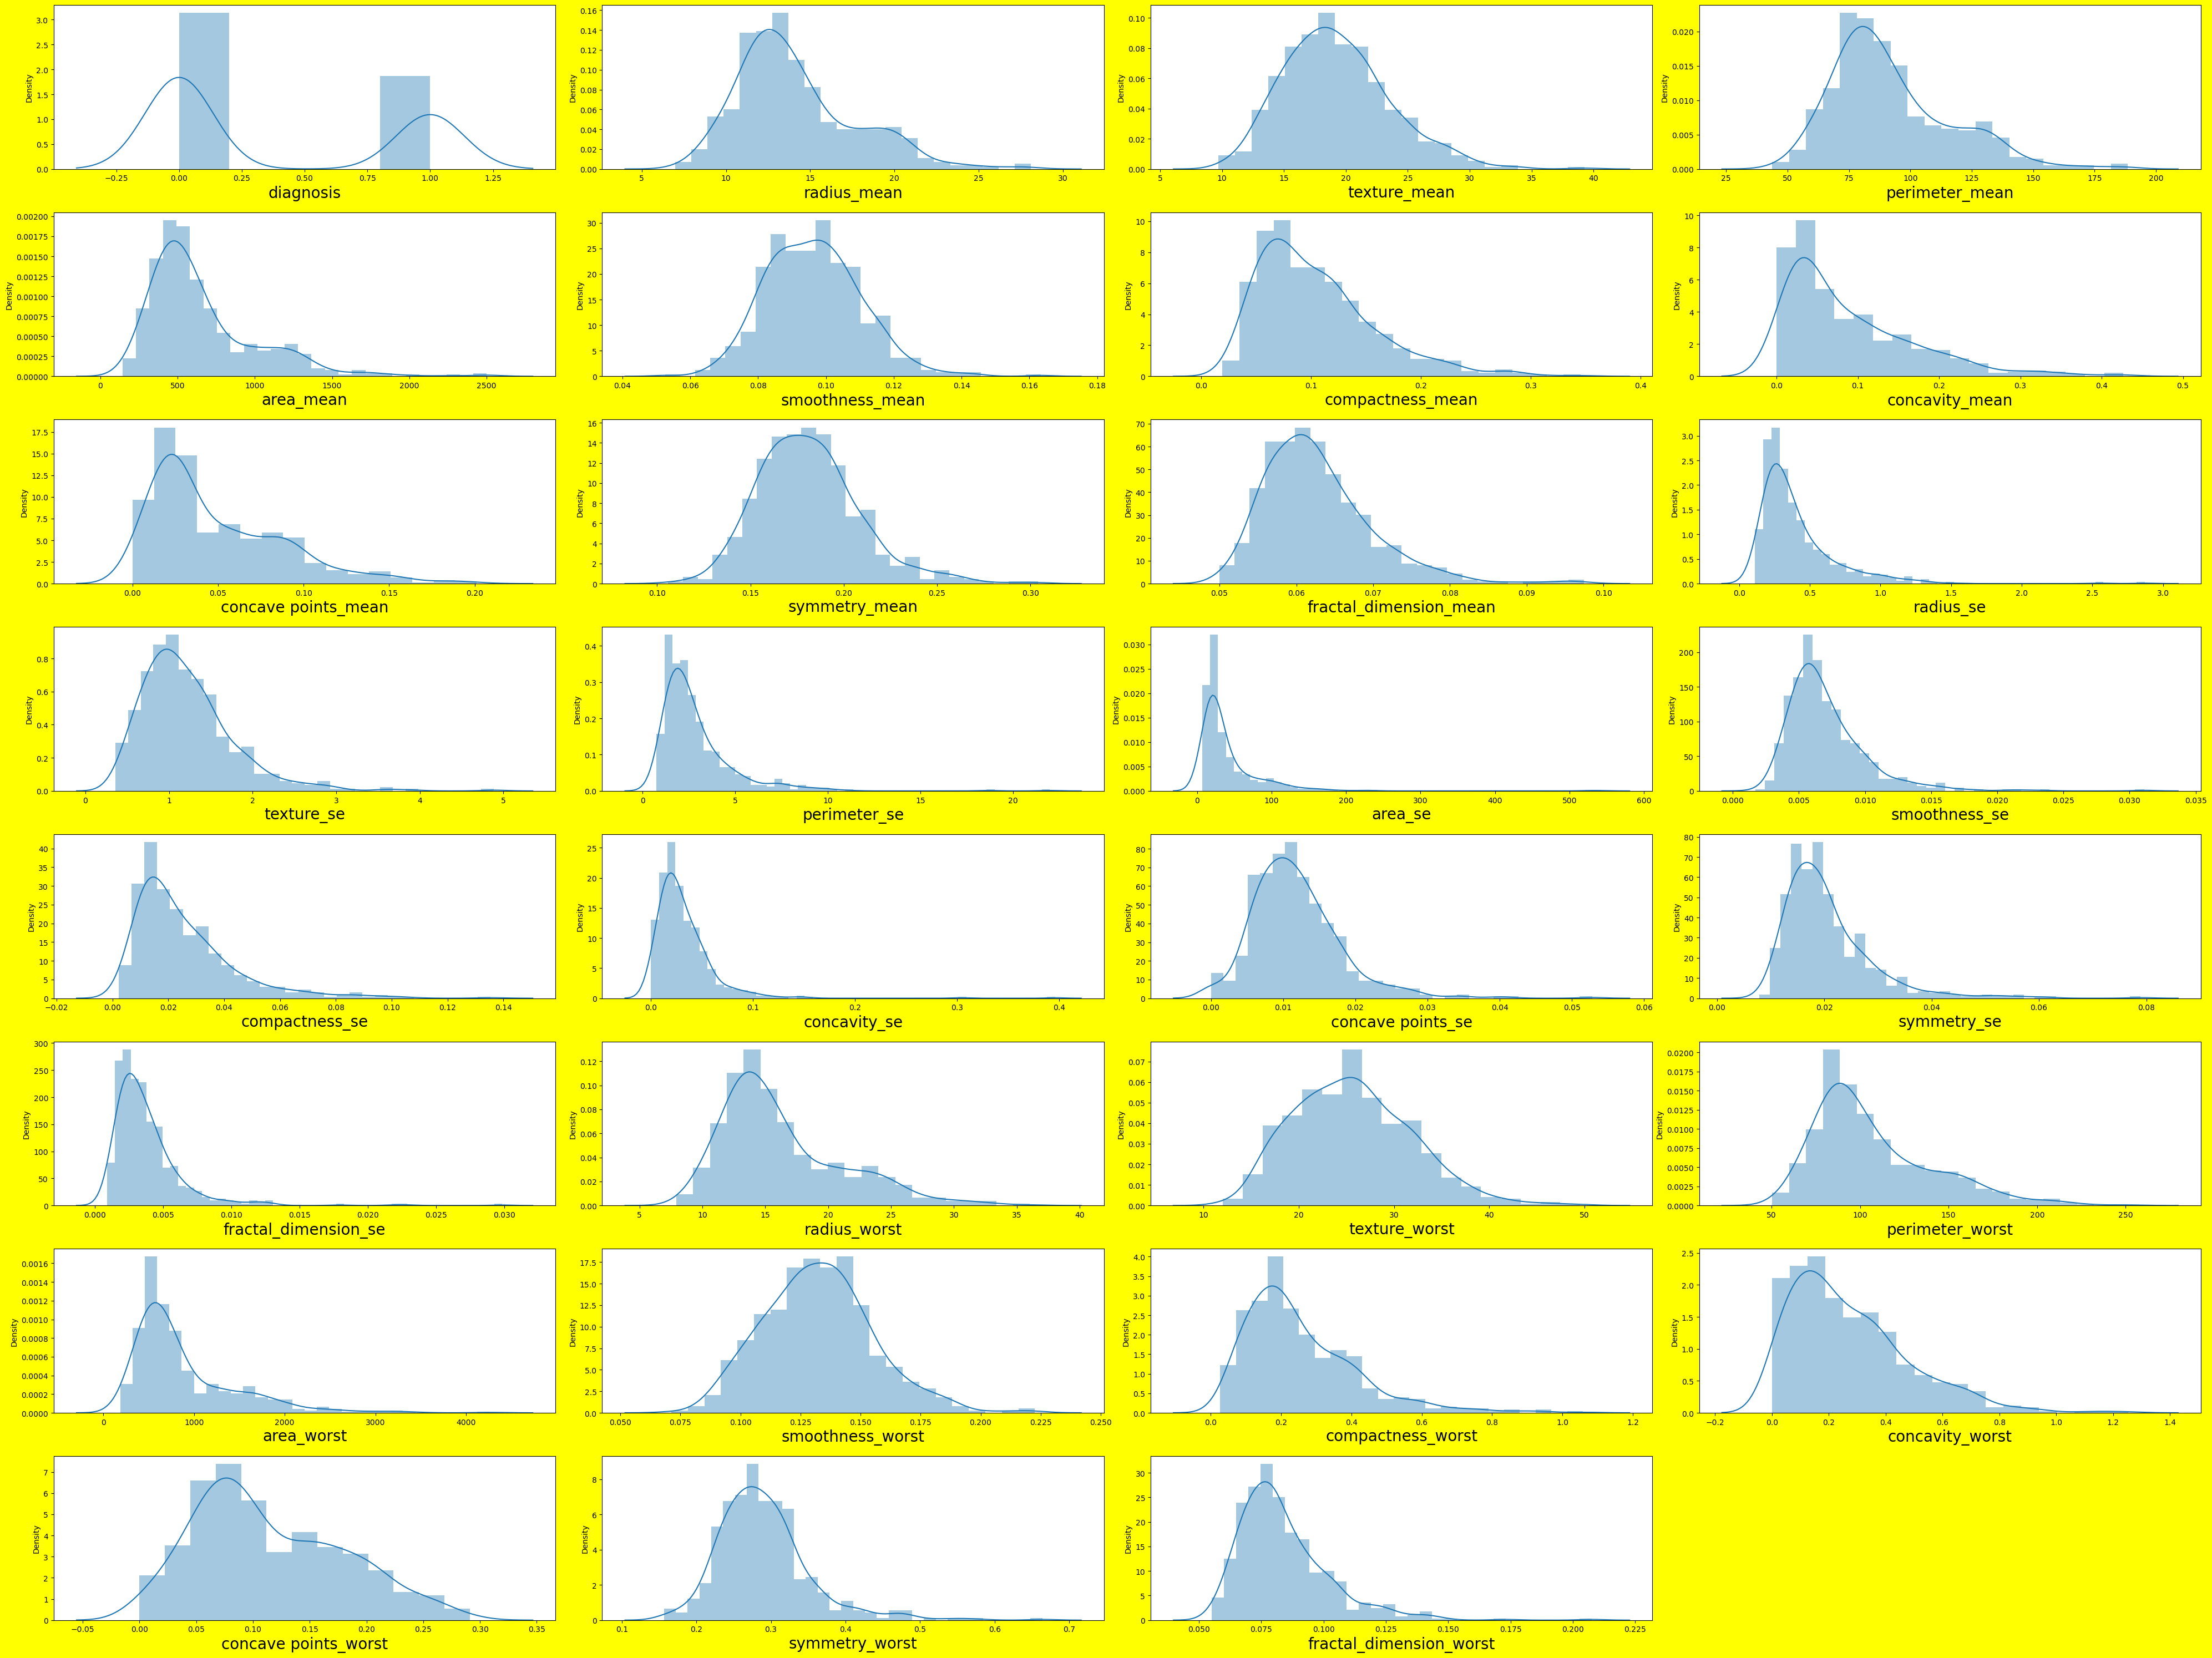

In [14]:
plt.figure(figsize=(40,30),facecolor='yellow')
plotnumber=1
for i in df:
    if plotnumber<=31:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

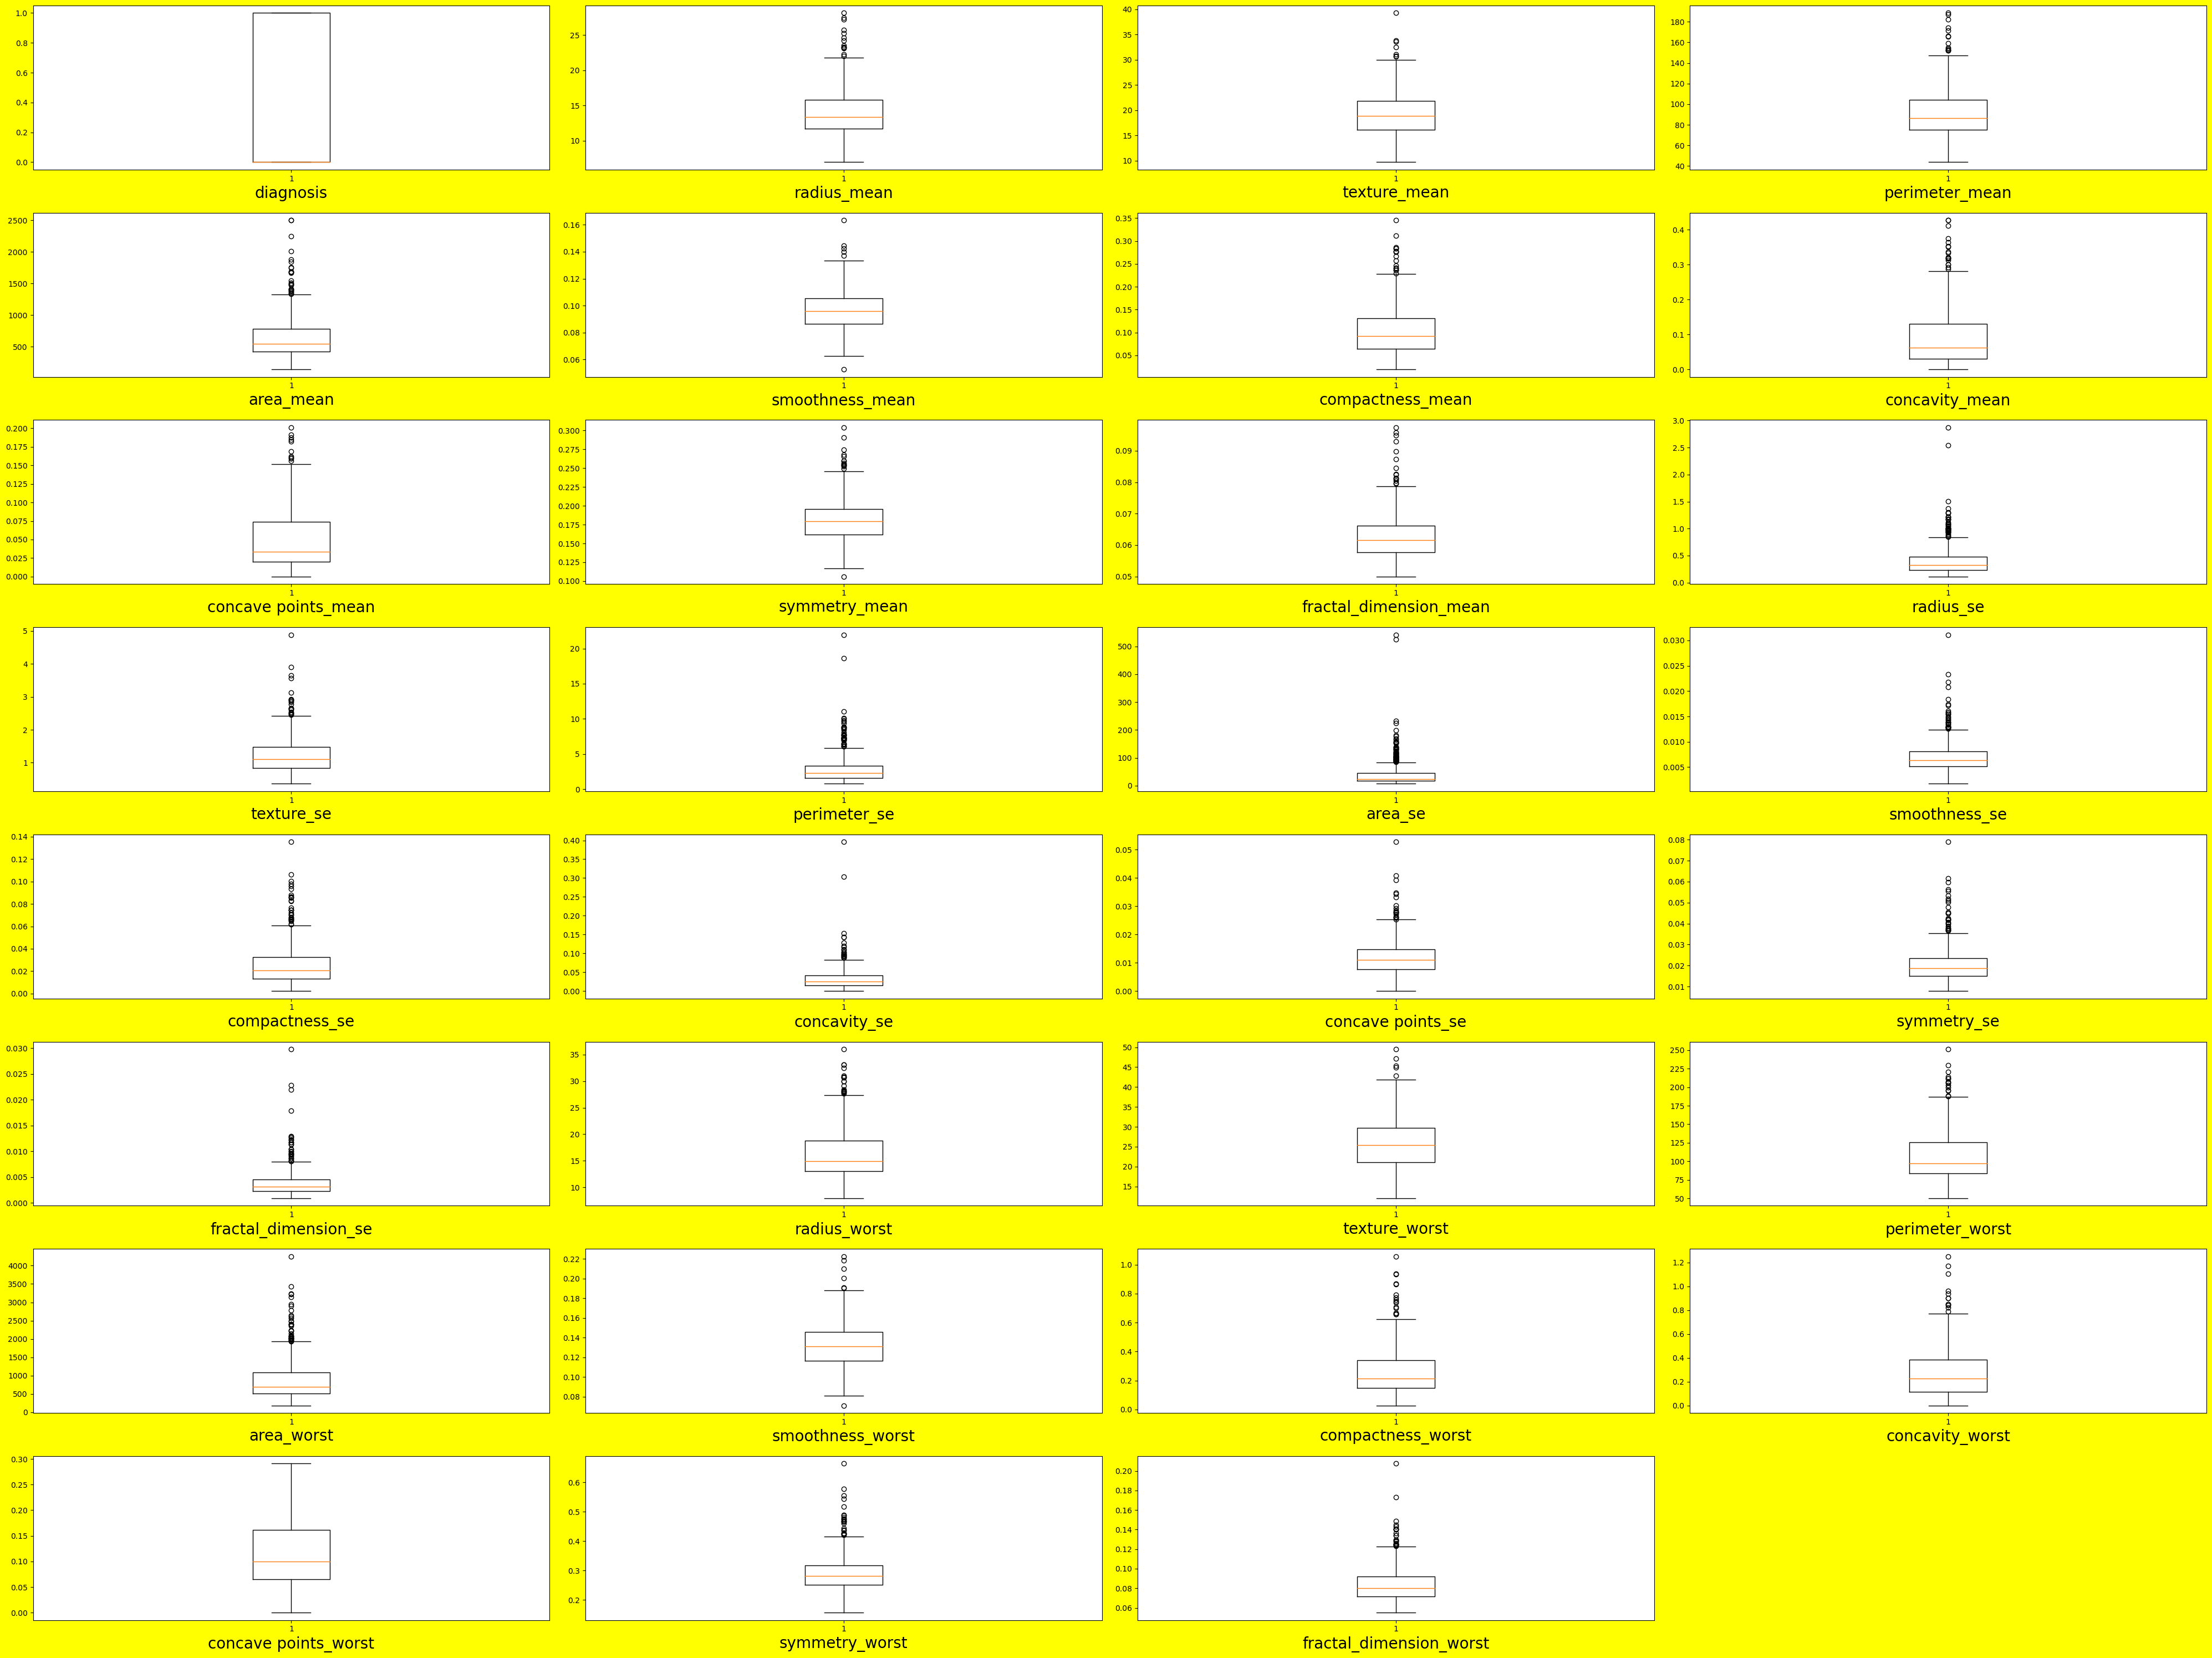

In [15]:
plt.figure(figsize=(40,30),facecolor='yellow')
plotnumber=1
for i in df:
    if plotnumber<=31:
        ax=plt.subplot(8,4,plotnumber)
        plt.boxplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [16]:
x=df.drop(['diagnosis'],axis=1)
y=df.diagnosis

In [17]:
data=zscore(x)
z_score=np.abs(data)
z_score

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,1.097064,2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
842517,1.829821,0.353632,1.685955,1.908708,0.826962,0.487072,0.023846,0.548144,0.001392,0.868652,...,1.805927,0.369203,1.535126,1.890489,0.375612,0.430444,0.146749,1.087084,0.243890,0.281190
84300903,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,0.398008,...,1.511870,0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
84348301,0.768909,0.253732,0.592687,0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.281464,0.133984,0.249939,0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
84358402,1.750297,1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,0.009560,0.562450,...,1.298575,1.466770,1.338539,1.220724,0.220556,0.313395,0.613179,0.729259,0.868353,0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926424,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,0.312589,0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,0.273318,0.664512,1.629151,1.360158,0.709091
926682,1.704854,2.085134,1.615931,1.723842,0.102458,0.017833,0.693043,1.263669,0.217664,1.058611,...,1.536720,2.047399,1.421940,1.494959,0.691230,0.394820,0.236573,0.733827,0.531855,0.973978
926954,0.702284,2.045574,0.672676,0.577953,0.840484,0.038680,0.046588,0.105777,0.809117,0.895587,...,0.561361,1.374854,0.579001,0.427906,0.809587,0.350735,0.326767,0.414069,1.104549,0.318409


In [18]:
np.where(z_score>3)

(array([  0,   3,   3,   3,   3,   3,   3,   3,   3,   9,   9,   9,  12,
         12,  12,  12,  12,  14,  14,  23,  25,  31,  31,  35,  42,  42,
         42,  60,  68,  68,  68,  68,  71,  71,  71,  71,  72,  78,  78,
         78,  78,  78,  82,  82,  82,  82,  82,  82,  82,  83, 105, 105,
        108, 108, 108, 108, 108, 108, 112, 112, 116, 119, 119, 122, 122,
        122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122, 122,
        138, 138, 146, 146, 146, 151, 151, 152, 152, 152, 152, 152, 152,
        176, 176, 180, 180, 180, 180, 180, 180, 180, 181, 181, 190, 190,
        190, 190, 190, 192, 202, 203, 212, 212, 212, 212, 212, 212, 212,
        213, 213, 213, 213, 213, 219, 219, 232, 236, 236, 239, 239, 258,
        258, 258, 259, 259, 265, 265, 265, 265, 265, 288, 288, 290, 290,
        314, 314, 318, 323, 339, 339, 345, 351, 352, 352, 352, 352, 352,
        352, 352, 352, 368, 368, 370, 376, 376, 376, 379, 379, 379, 388,
        389, 400, 416, 417, 417, 430, 461, 461, 461

In [19]:
df.iloc[0,5]

0.1184

In [20]:
filter_data=(z_score<3).all(axis=1)
df=df[filter_data]
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925292,0,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
926125,1,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115


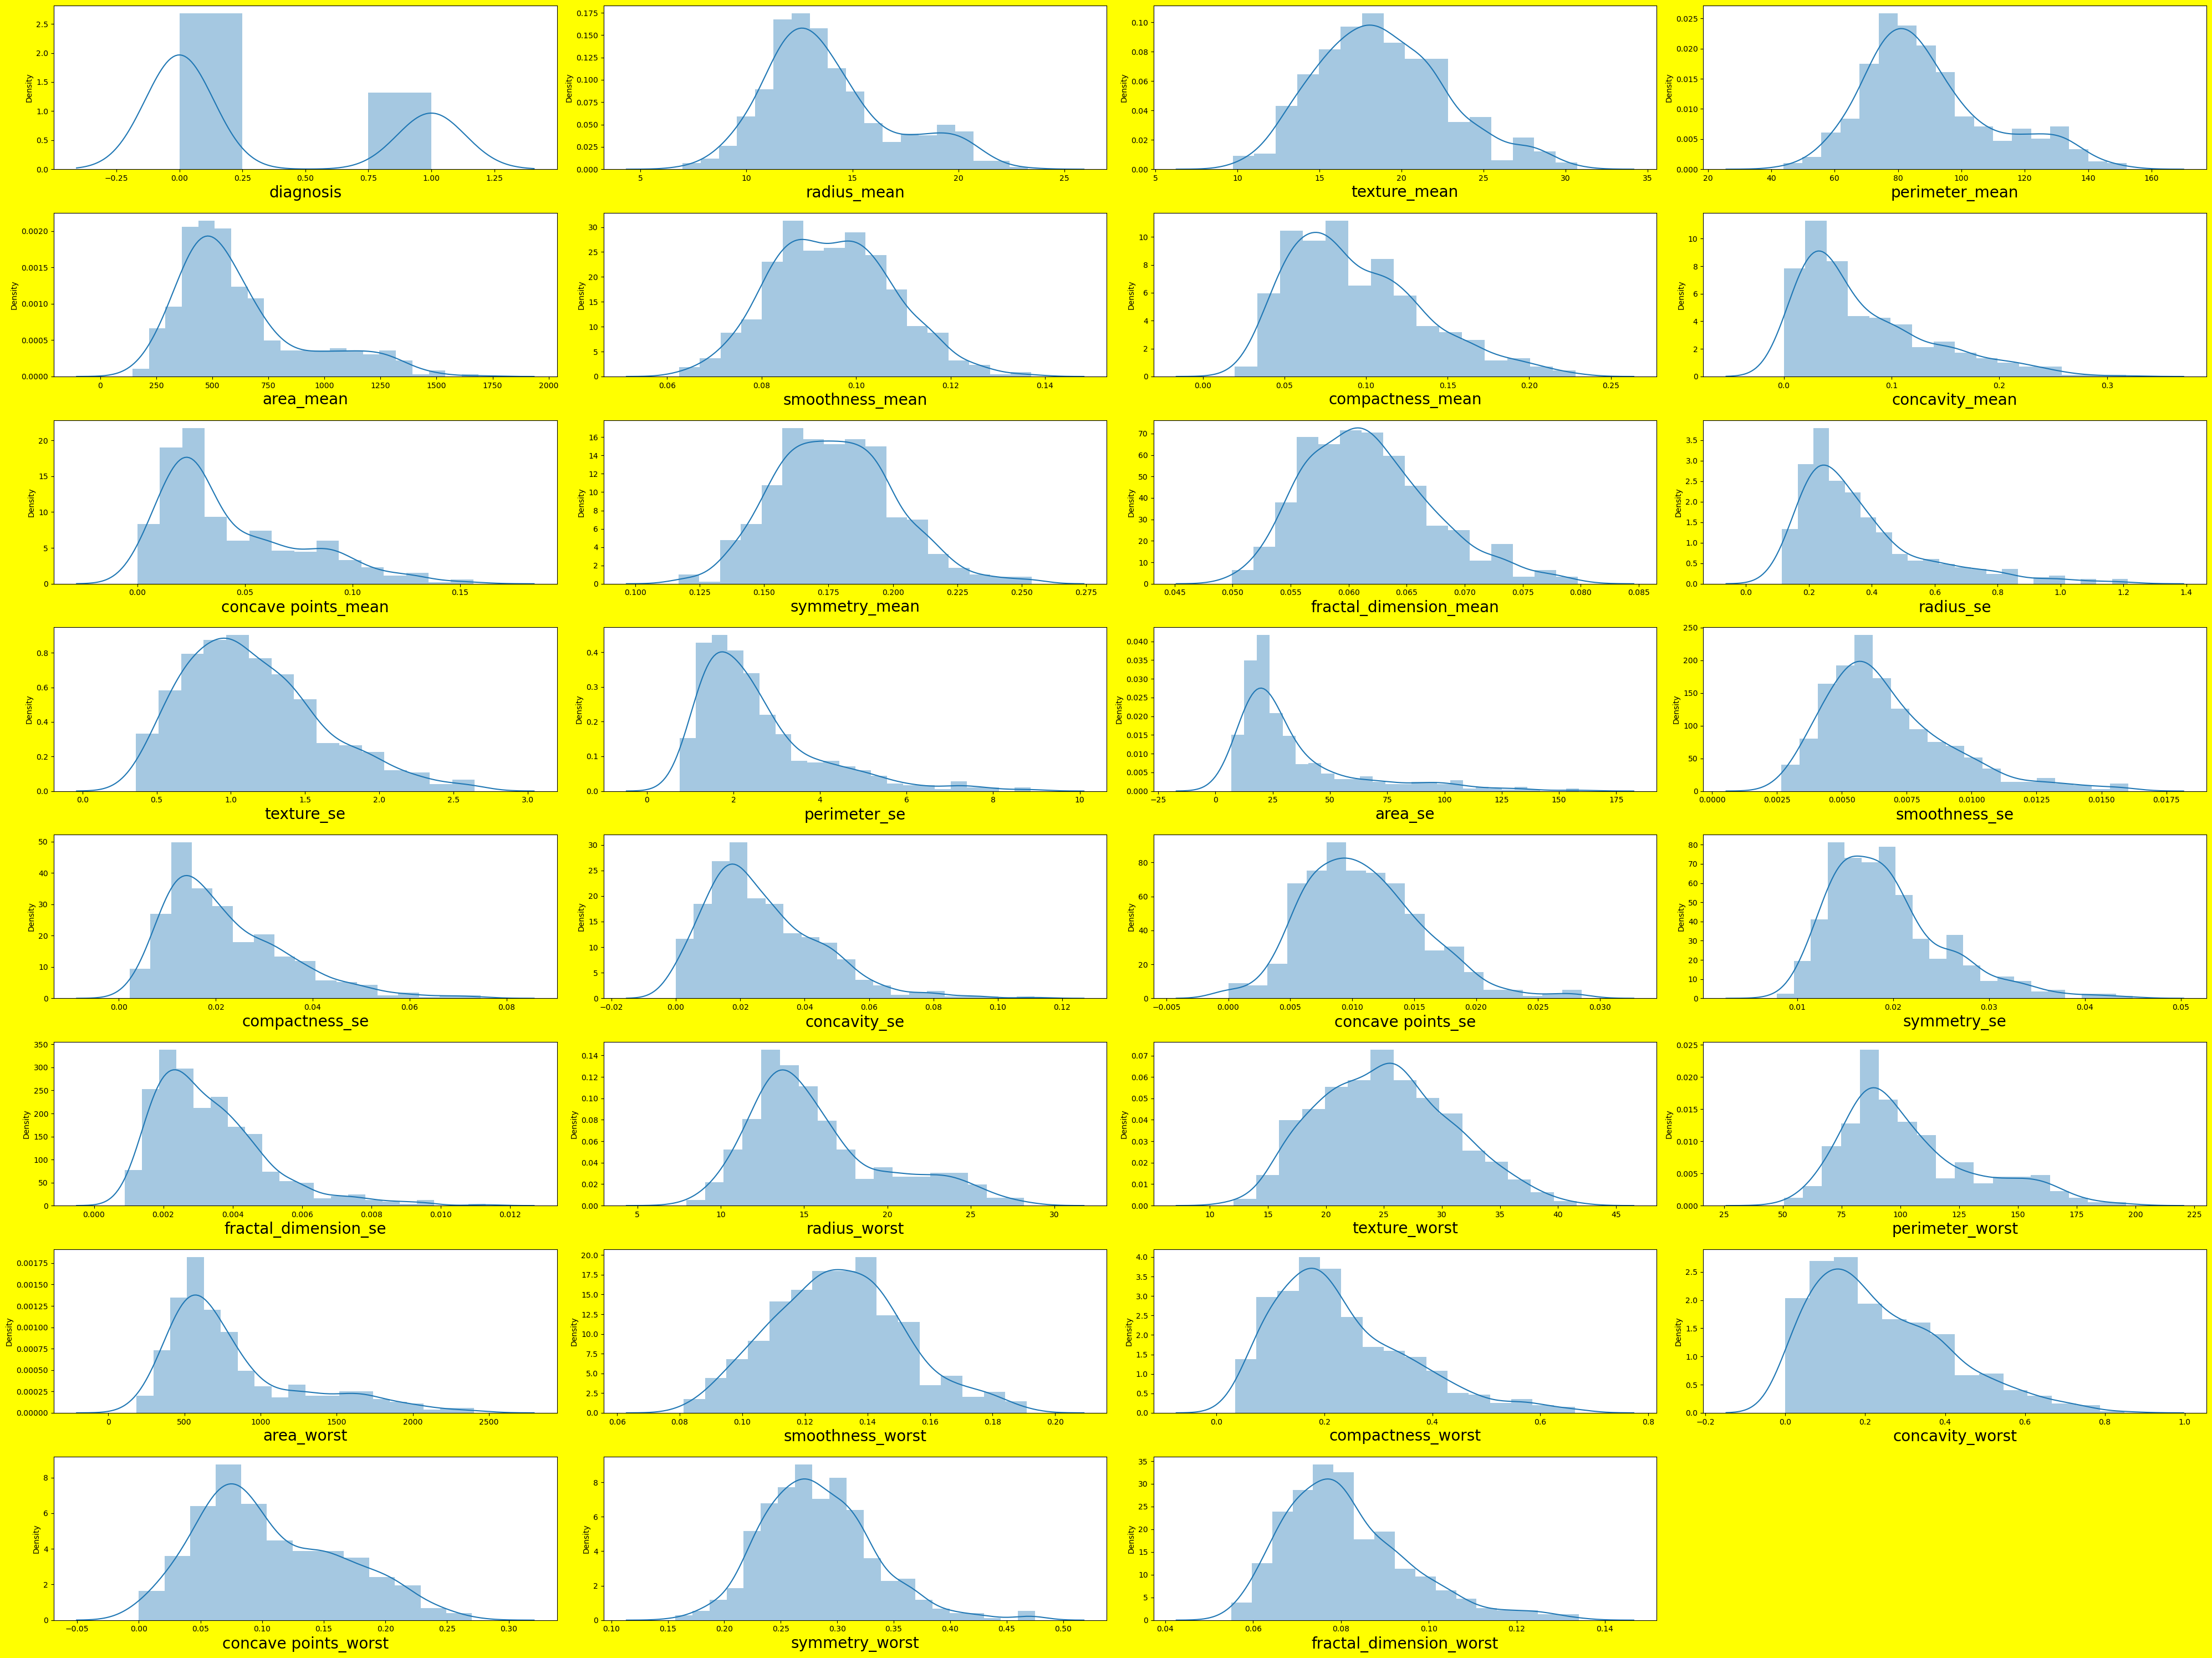

In [21]:
plt.figure(figsize=(40,30),facecolor='yellow')
plotnumber=1
for i in df:
    if plotnumber<=31:
        ax=plt.subplot(8,4,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.tight_layout()

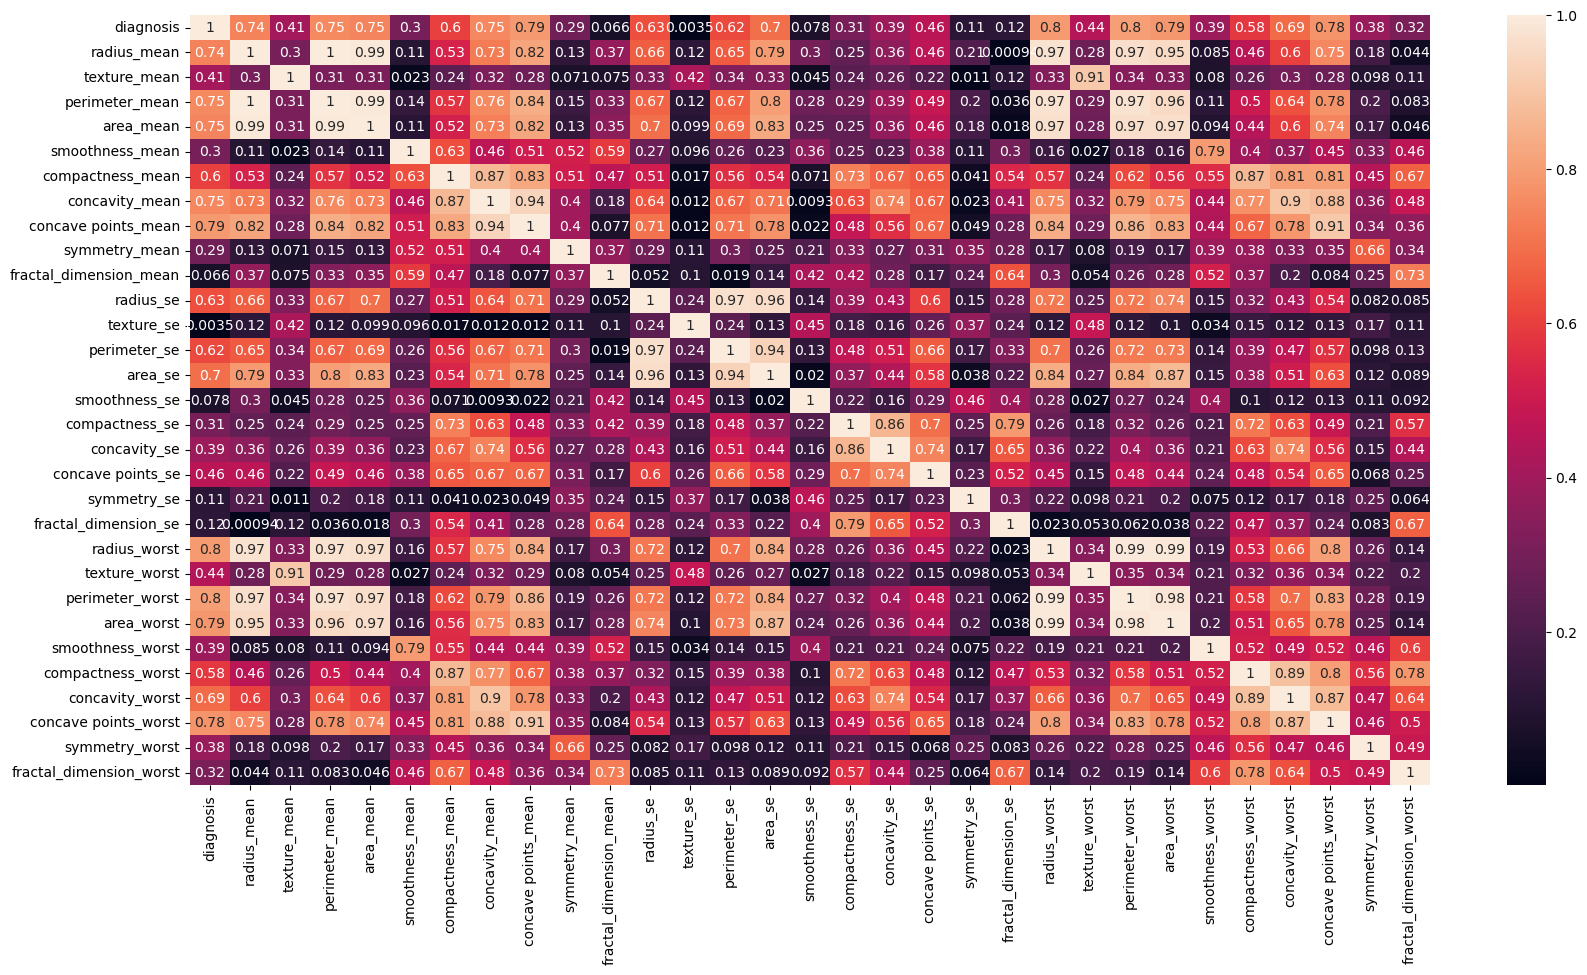

In [22]:
data=df.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(data,annot=True)
plt.show()

In [23]:
x=df.drop(['diagnosis'],axis=1)
y=df.x=df.diagnosis

In [24]:
x_scaler=StandardScaler()
x_scalerr=x_scaler.fit_transform(x)
x_scalerr

array([[ 2.20446536, -0.28261218,  2.06835079, ...,  1.36512913,
        -0.17708262,  0.52461532],
       [ 1.91497191,  0.5956785 ,  1.92875368, ...,  2.34544773,
         1.56196975,  0.42458997],
       [ 2.11235381, -1.14828374,  2.17425205, ...,  0.9609627 ,
        -0.95492065, -0.32560022],
       ...,
       [ 2.53014549,  0.88339441,  2.50639691, ...,  1.97739829,
        -1.56751847, -0.71667159],
       [ 2.05971864,  2.36235515,  1.986518  , ...,  0.96612227,
        -0.53577477, -1.04870021],
       [ 0.89845514,  2.31945015,  0.88418216, ...,  0.60495226,
        -1.24912881, -0.22696411]])

In [25]:
x_scalerr.shape[1]

30

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scalerr,i) for i in range(x_scalerr.shape[1])]
vif['Feature']=x.columns
vif

,VIF,Feature
0,4656.598728,radius_mean
1,14.492987,texture_mean
2,4413.733013,perimeter_mean
3,451.307892,area_mean
4,9.752334,smoothness_mean
5,40.357595,compactness_mean
6,59.308107,concavity_mean
7,52.980515,concave points_mean
8,3.855082,symmetry_mean
9,11.609001,fractal_dimension_mean


In [27]:
df['diagnosis'].value_counts()

diagnosis
0    332
1    163
Name: count, dtype: int64

In [29]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=40,k_neighbors=3,sampling_strategy=0.80)
x_samp,y_samp=sm.fit_resample(x_scalerr,y)

In [30]:
from collections import Counter

print("The frequecy of class before fit : ",format(Counter(y)))
print("The frequecy of class after fit : ",format(Counter(y_samp)))

The frequecy of class before fit :  Counter({0: 332, 1: 163})
The frequecy of class after fit :  Counter({0: 332, 1: 265})


In [31]:
from sklearn.feature_selection import SelectKBest,f_classif
feature_Sel=SelectKBest(score_func=f_classif,k=17)
feature_Sel.fit(x_scalerr,y)

SelectKBest(k=17)

In [32]:
df_feature_score=pd.DataFrame(feature_Sel.scores_)
df_feature_column=pd.DataFrame(x.columns)
concatinate=pd.concat([df_feature_column,df_feature_score],axis=1)
concatinate.columns=['Feature_Name','Score']
concatinate

,Feature_Name,Score
0,radius_mean,601.236825
1,texture_mean,97.942248
2,perimeter_mean,650.547521
3,area_mean,617.398450
4,smoothness_mean,50.207042
5,compactness_mean,280.311672
6,concavity_mean,644.978361
7,concave points_mean,822.656614
8,symmetry_mean,46.503933
9,fractal_dimension_mean,2.171865


In [33]:
print(concatinate.nlargest(19,'Score'))

            Feature_Name       Score
22       perimeter_worst  885.034320
20          radius_worst  851.489347
7    concave points_mean  822.656614
23            area_worst  793.749507
27  concave points_worst  765.662541
2         perimeter_mean  650.547521
6         concavity_mean  644.978361
3              area_mean  617.398450
0            radius_mean  601.236825
13               area_se  462.214659
26       concavity_worst  443.663100
10             radius_se  325.009571
12          perimeter_se  304.765782
5       compactness_mean  280.311672
25     compactness_worst  255.088911
17     concave points_se  130.577096
21         texture_worst  120.616098
1           texture_mean   97.942248
16          concavity_se   88.647488


In [34]:
new_x=df[['perimeter_worst','radius_worst','concave points_mean','area_worst','concave points_worst','perimeter_mean',
          'concavity_mean','area_mean','radius_mean','area_se','concavity_worst','radius_se','perimeter_se','compactness_mean',
          'compactness_worst','concave points_se','texture_worst','texture_mean','concavity_se']]      

In [35]:
new_x

,perimeter_worst,radius_worst,concave points_mean,area_worst,concave points_worst,perimeter_mean,concavity_mean,area_mean,radius_mean,area_se,concavity_worst,radius_se,perimeter_se,compactness_mean,compactness_worst,concave points_se,texture_worst,texture_mean,concavity_se
id,,,,,,,,,,,,,,,,,,,
842517,158.8,24.99,0.07017,1956.0,0.1860,132.90,0.08690,1326.0,20.57,74.08,0.2416,0.5435,3.398,0.07864,0.1866,0.01340,23.41,17.77,0.01860
84300903,152.5,23.57,0.12790,1709.0,0.2430,130.00,0.19740,1203.0,19.69,94.03,0.4504,0.7456,4.585,0.15990,0.4245,0.02058,25.53,21.25,0.03832
84358402,152.2,22.54,0.10430,1575.0,0.1625,135.10,0.19800,1297.0,20.29,94.44,0.4000,0.7572,5.438,0.13280,0.2050,0.01885,16.67,14.34,0.05688
843786,103.4,15.47,0.08089,741.6,0.1741,82.57,0.15780,477.1,12.45,27.19,0.5355,0.3345,2.217,0.17000,0.5249,0.01137,23.75,15.70,0.03672
844359,153.2,22.88,0.07400,1606.0,0.1932,119.60,0.11270,1040.0,18.25,53.91,0.3784,0.4467,3.180,0.10900,0.2576,0.01039,27.66,19.98,0.02254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925292,100.2,15.30,0.04304,706.7,0.1048,91.38,0.04462,600.4,14.05,29.84,0.1326,0.3645,2.888,0.11260,0.2264,0.01626,33.17,27.15,0.02071
926125,179.1,24.29,0.14740,1819.0,0.2542,143.00,0.31740,1347.0,20.92,118.80,0.6599,0.9622,8.758,0.22360,0.4186,0.02624,29.41,25.09,0.07845
926424,166.1,25.45,0.13890,2027.0,0.2216,142.00,0.24390,1479.0,21.56,158.70,0.4107,1.1760,7.673,0.11590,0.2113,0.02454,26.40,22.39,0.05198


In [40]:
x_scaler=StandardScaler()
x_sca=x_scaler.fit_transform(new_x)
x_sca

array([[ 1.93887045,  2.21566986,  0.82614227, ..., -0.30781919,
        -0.28261218, -0.47629673],
       [ 1.71612918,  1.87156245,  2.60149804, ...,  0.06672045,
         0.5956785 ,  0.63966934],
       [ 1.70552245,  1.62196342,  1.87573334, ..., -1.49857258,
        -1.14828374,  1.68999034],
       ...,
       [ 2.19696748,  2.32714128,  2.9397782 , ...,  0.22042304,
         0.88339441,  1.41269654],
       [ 1.80451857,  1.90064195,  1.67922332, ...,  2.3139583 ,
         2.36235515,  0.70644621],
       [ 0.80395064,  0.7592716 ,  0.29873275, ...,  1.58431268,
         2.31945015,  1.14785267]])

In [41]:
x_train,x_test,y_train,y_test =train_test_split(x_sca,y,train_size=0.75,random_state=355)

In [53]:
def metrics_score(clf,x_train1,x_test1,y_train1,y_test1,train=True):
    if train:
        y_pred=clf.predict(x_train1)
        print("***************Train Result************")
        print("Accuracy Score", accuracy_score(y_train1,y_pred))
    elif train==False:
        pred=clf.predict(x_test1)
        print(pred)
        print("***************Test Result************")
        print("Accuracy Score", accuracy_score(y_test1,pred))
        
        print("Classification Report \n", classification_report(y_test1,pred))    

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [56]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [57]:
metrics_score(knn,x_train,x_test,y_train,y_test,train=True)

metrics_score(knn,x_train,x_test,y_train,y_test,train=False)

***************Train Result************
Accuracy Score 0.9757412398921833
[0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 1 0 1 1 1 0 1 0 0 1 0 1 1]
***************Test Result************
Accuracy Score 0.967741935483871
Classification Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        77
           1       1.00      0.91      0.96        47

    accuracy                           0.97       124
   macro avg       0.98      0.96      0.97       124
weighted avg       0.97      0.97      0.97       124



In [63]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn,x_sca,y,cv=5).mean()

0.9616161616161616

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid={'algorithm':['kd_tree','brute'],
            'leaf_size':[3,5,6,7,8],
            'n_neighbors':[3,5,7,9,11,13]}

In [62]:
gridsearch=GridSearchCV(estimator=knn, param_grid=param_grid)

In [65]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [3, 5, 6, 7, 8],
                         'n_neighbors': [3, 5, 7, 9, 11, 13]})

In [69]:
gridsearch.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3)

In [70]:
knn=KNeighborsClassifier(algorithm='kd_tree', leaf_size=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=3)

In [71]:
metrics_score(knn,x_train,x_test,y_train,y_test,train=True)

metrics_score(knn,x_train,x_test,y_train,y_test,train=False)

***************Train Result************
Accuracy Score 0.9757412398921833
[0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0
 1 0 1 1 1 0 1 0 0 1 0 1 1]
***************Test Result************
Accuracy Score 0.967741935483871
Classification Report 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        77
           1       1.00      0.91      0.96        47

    accuracy                           0.97       124
   macro avg       0.98      0.96      0.97       124
weighted avg       0.97      0.97      0.97       124



In [72]:
y_pred=knn.predict(x_test)

In [73]:
confu=confusion_matrix(y_test,y_pred)
confu

array([[77,  0],
       [ 4, 43]], dtype=int64)